In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\user\\Documents\\data sets\\titanic.missing.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,NaN,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          327
Embarked         0
dtype: int64

In [6]:
df = df.filter(['Age','Fare','Survived','Parch'])

In [7]:
df.head()

,Age,Fare,Survived,Parch
0,34.5,7.8292,0,0
1,47.0,7.0000,1,0
2,62.0,NaN,0,0
3,27.0,8.6625,0,0
4,22.0,12.2875,1,1


In [8]:
df.isnull().mean()

Age         0.205742
Fare        0.043062
Survived    0.000000
Parch       0.000000
dtype: float64

In [9]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
x_train.shape,x_test.shape

((334, 3), (84, 3))

In [12]:
x_train.isnull().mean()

Age      0.206587
Fare     0.044910
Parch    0.000000
dtype: float64

In [13]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [14]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [15]:
x_train.sample(3)

,Age,Fare,Parch,Age_median,Age_mean,Fare_median,Fare_mean
99,33.0,8.05,0,33.0,33.000000,8.05,8.05
279,22.0,10.50,0,22.0,22.000000,10.50,10.50
33,NaN,23.45,2,28.0,30.466038,23.45,23.45


In [16]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  207.5395073470555
Age Variance after median imputation:  165.53560393087707
Age Variance after mean imputation:  164.53582564451239
Original Fare variable variance:  3630.7048850213037
Fare Variance after median imputation:  3490.426670839425
Fare Variance after mean imputation:  3467.159619930254


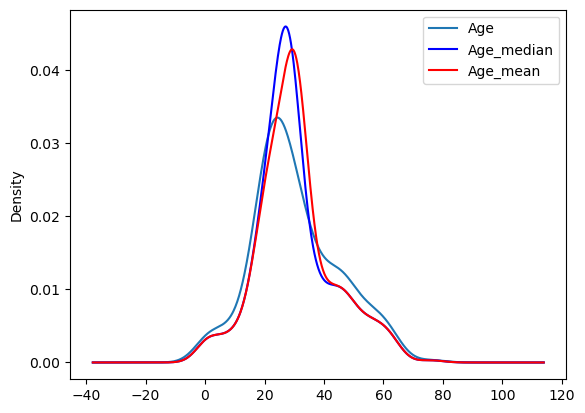

In [17]:
import  matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind = 'kde',ax=ax)

# varibale imputed with the median
x_train['Age_median'].plot(kind='kde',ax=ax,color = 'blue')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

# add label
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

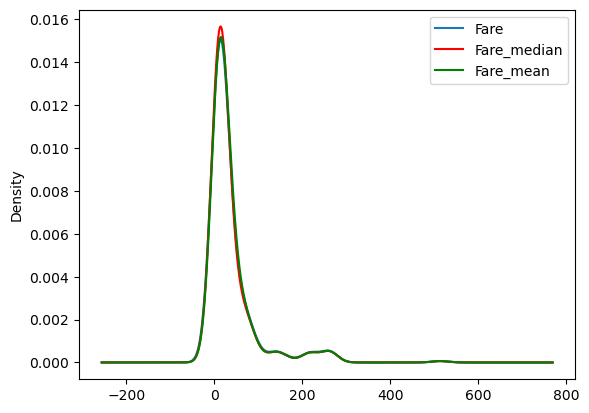

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
x_train.cov()

,Age,Fare,Parch,Age_median,Age_mean,Fare_median,Fare_mean
Age,207.539507,316.610858,-0.995879,207.539507,207.539507,291.902263,301.096415
Fare,316.610858,3630.704885,15.635469,261.537076,249.966835,3630.704885,3630.704885
Parch,-0.995879,15.635469,0.996493,-0.765314,-0.789526,14.856314,14.931169
Age_median,207.539507,261.537076,-0.765314,165.535604,164.535826,242.622271,249.756126
Age_mean,207.539507,249.966835,-0.789526,164.535826,164.535826,231.418010,238.707068
Fare_median,291.902263,3630.704885,14.856314,242.622271,231.418010,3490.426671,3467.159620
Fare_mean,301.096415,3630.704885,14.931169,249.756126,238.707068,3467.159620,3467.159620


In [20]:
x_train.corr()

,Age,Fare,Parch,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.337204,-0.086661,1.000000,1.000000,0.313171,0.324297
Fare,0.337204,1.000000,0.264518,0.340424,0.326027,1.000000,1.000000
Parch,-0.086661,0.264518,1.000000,-0.059588,-0.061659,0.251904,0.254021
Age_median,1.000000,0.340424,-0.059588,1.000000,0.996976,0.319187,0.329673
Age_mean,1.000000,0.326027,-0.061659,0.996976,1.000000,0.305371,0.316044
Fare_median,0.313171,1.000000,0.251904,0.319187,0.305371,1.000000,0.996661
Fare_mean,0.324297,1.000000,0.254021,0.329673,0.316044,0.996661,1.000000


<Axes: >

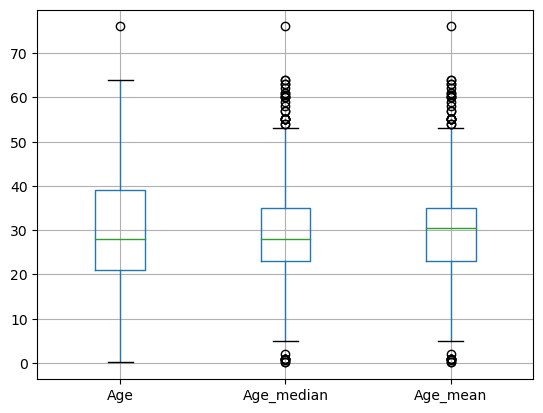

In [21]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

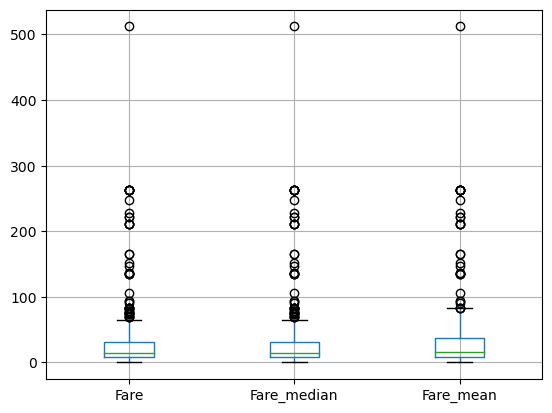

In [22]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# By library sklearn

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [25]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [26]:
col = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [27]:
col.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
col.named_transformers_['imputer1'].statistics_

array([28.])

In [29]:
col.named_transformers_['imputer2'].statistics_

array([37.70966614])

In [30]:
x_train = col.transform(x_train)
x_test = col.transform(x_test)

In [31]:
x_train


array([[39.    ,  7.2292,  2.    ],
       [53.    , 27.4458,  0.    ],
       [22.    ,  8.6625,  0.    ],
       ...,
       [24.    ,  7.25  ,  0.    ],
       [20.    ,  7.8542,  0.    ],
       [21.    ,  8.6625,  0.    ]])